In [1]:
using LinearAlgebra
using SparseArrays
using Plots

In [2]:
# Arnoldi process
#  u = some starting vector
function arnoldi(A, u, m)
    n = size(A, 1)
    Q = zeros(n, m+1)
    H = zeros(m+1, m)
    Q[:, 1] = u / norm(u)
    for j in 1:m
        v = A*Q[:, j]
        for i in 1:j
            H[i, j] = Q[:, i]' * v
            v -= H[i, j] * Q[:, i]
        end
        H[j+1, j] = norm(v)
        Q[:, j+1] = v / H[j+1, j]
    end
    Q, H
end

arnoldi (generic function with 1 method)

In [3]:
n = 100
M = 29
λ =  [i+10 for i in 1:n]
A_ = randn(n, n)
A = UpperTriangular(A_) - diagm(diag(A_)) + diagm(λ)
b = randn(n, 1);

In [22]:
# Instead of building up the Krylov matrices, using Arnoldi iteration to generate equivalent orthonormal vectors
Q, H = arnoldi(A, b, M)
res = zeros(M, 1)
# The Arnoldi bases are used to solve the least square problems defining the GMRES iterates
for m in 1:M
    s = norm(b) * Matrix(I, m+1, m+1)[:, 1] #vcat(norm(b), zeros(m, 1)) -> norm(b) e1(m+1, 1)
    z = H[1:m+1, 1:m] \ s
    x = Q[:, 1:m] * z
    res[m] = norm(b - A*x)
end

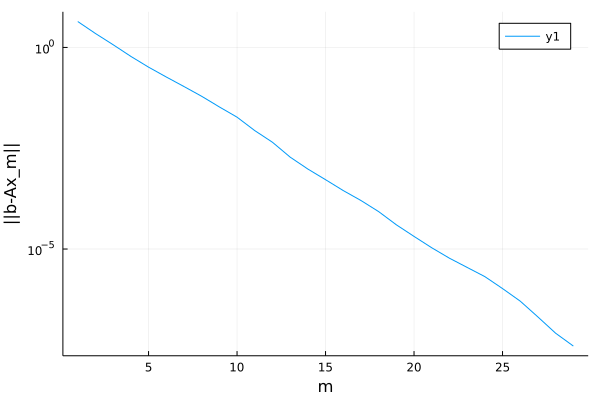

In [23]:
plot(1:M, res, yaxis=:log, xlabel=:"m", ylabel=:"||b-Ax_m||")

In [12]:
## Magic matrix
A = [
    35     1     6    26    19    24;
     3    32     7    21    23    25;
    31     9     2    22    27    20;
     8    28    33    17    10    15;
    30     5    34    12    14    16;
     4    36    29    13    18    11
];
# Seed vector
u = randn(6, 1);
q = u / norm(u);


In [13]:
Aq = A * q;
v = Aq - (q' * Aq) .* q
Q = hcat(q, v/norm(v))

Aq = A * Q[:, 2];
v = Aq - (Q[:,1]' * Aq) .* Q[:, 1] - (Q[:,2]' * Aq) .* Q[:, 2]
Q = hcat(Q, v/norm(v));
norm(Q'*Q - I)

5.854999396449419e-16

In [14]:
Q

6×3 Matrix{Float64}:
 -0.259172    0.308073   0.843104
  0.360015    0.238851   0.256609
  0.804421   -0.348439   0.323651
  0.309543    0.500031  -0.277515
 -0.0136294   0.462533   0.064174
  0.245203    0.512508  -0.193505

In [15]:
K = [u A*u A*A*u]

6×3 Matrix{Float64}:
 -0.611219    23.0872  7303.03
  0.849043    67.6633  8540.09
  1.89711     19.2457  7416.14
  0.730012   102.251   6608.52
 -0.0321429   67.9729  5438.47
  0.578275    98.4094  6721.63

In [16]:
QK = hcat(Q, K)

6×6 Matrix{Float64}:
 -0.259172    0.308073   0.843104  -0.611219    23.0872  7303.03
  0.360015    0.238851   0.256609   0.849043    67.6633  8540.09
  0.804421   -0.348439   0.323651   1.89711     19.2457  7416.14
  0.309543    0.500031  -0.277515   0.730012   102.251   6608.52
 -0.0136294   0.462533   0.064174  -0.0321429   67.9729  5438.47
  0.245203    0.512508  -0.193505   0.578275    98.4094  6721.63

In [17]:
rank(QK)

3

In [18]:
Q, H = arnoldi(A, u, 5);
Q

6×6 Matrix{Float64}:
 -0.259172    0.308073   0.843104   0.0174062   -0.290069   -0.206525
  0.360015    0.238851   0.256609  -0.682308     0.48815     0.208941
  0.804421   -0.348439   0.323651   0.337013    -0.112794   -0.0211696
  0.309543    0.500031  -0.277515  -0.00699691  -0.0117338  -0.759573
 -0.0136294   0.462533   0.064174   0.647206     0.542853    0.261139
  0.245203    0.512508  -0.193505  -0.0406234   -0.608292    0.517781

In [19]:
H

6×5 Matrix{Float64}:
 37.6164  49.6759  21.9777   2.10674   11.0063
 63.4222  35.7291  32.7039   3.55141    3.30836
  0.0     53.2405  19.2833  15.6864   -15.5447
  0.0      0.0     24.7029  19.116    -17.3185
  0.0      0.0      0.0      3.50642   -6.54436
  0.0      0.0      0.0      0.0        7.69239